In [3]:
def inside(point, clip_edge):
    return (clip_edge[1][0] - clip_edge[0][0]) * (point[1] - clip_edge[0][1]) > (clip_edge[1][1] - clip_edge[0][1]) * (point[0] - clip_edge[0][0])

def intersection(point1, point2, clip_edge):
    dx = point2[0] - point1[0]
    dy = point2[1] - point1[1]
    m = dy / dx
    b = point1[1] - m * point1[0]

    if clip_edge[0][0] == clip_edge[1][0]:
        x = clip_edge[0][0]
        y = m * x + b
    else:
        m_clip = (clip_edge[1][1] - clip_edge[0][1]) / (clip_edge[1][0] - clip_edge[0][0])
        b_clip = clip_edge[0][1] - m_clip * clip_edge[0][0]

        x = (b_clip - b) / (m - m_clip)
        y = m * x + b

    return x, y

def sutherland_hodgman(poly_points, clip_points):
    output = poly_points

    for edge in range(4):
        clip_edge = (clip_points[edge], clip_points[(edge + 1) % 4])
        input_list = output
        output = []

        S = input_list[-1]
        for E in input_list:
            if inside(E, clip_edge):
                if not inside(S, clip_edge):
                    output.append(intersection(S, E, clip_edge))
                output.append(E)
            elif inside(S, clip_edge):
                output.append(intersection(S, E, clip_edge))
            S = E

    return output

# Input endpoints of the polygon and screen dimensions
polygon_points = []
for i in range(4):
    point = tuple(map(int, input(f"Enter endpoint {i+1} (x y): ").split()))
    polygon_points.append(point)

width = int(input("Enter screen width: "))
height = int(input("Enter screen height: "))

# Define clipping window as a rectangle with its vertices in clockwise order
clip_points = [(0, 0), (width, 0), (width, height), (0, height)]

# Perform Sutherland-Hodgman polygon clipping
clipped_polygon = sutherland_hodgman(polygon_points, clip_points)

# Print the coordinates of the clipped polygon
print("Clipped Polygon:")
for point in clipped_polygon:
    print(point)

Enter endpoint 1 (x y): 150 70
Enter endpoint 2 (x y): 20 110
Enter endpoint 3 (x y): -20 20
Enter endpoint 4 (x y): 30 -10
Enter screen width: 100
Enter screen height: 100
Clipped Polygon:
(45.0, 0.0)
(100, 36.66666666666666)
(100, 85.38461538461539)
(52.50000000000003, 100.0)
(15.555555555555555, 100.0)
(0, 65.0)
(0, 8.0)
(13.333333333333334, 0.0)


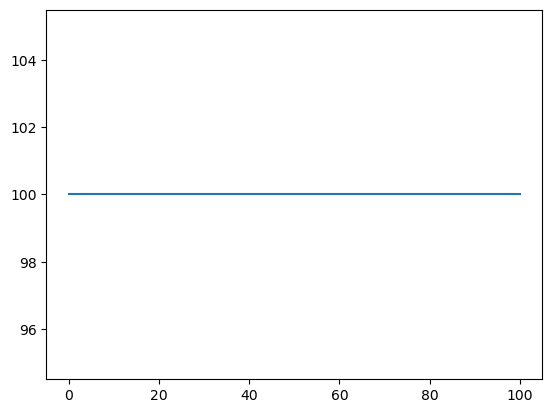

In [16]:
#Printing the original polygon and the screen
import matplotlib.pyplot as plt
#plt.plot([0,0], [0,100])
#plt.plot([0,0], [100,0])
#plt.plot([0,100],[100,100])
#plt.plot([100,0],[100,100])